<CENTER>
</br>
<p><font size="5"> TAR: Taller de Aprendizaje por Refuerzo 2025</span></p>
<p><font size="5">  LAB 2: RL</font></p>
</p></br>
</p>
</CENTER>


----------------------------

## Machine replacement - Continuation of Lab 1


In previous lab, we have computed the optimal policy using Dynamic Programming solutions In this lab, we focus on implicit simulation-based algorithms for solving MDPs, called reinforcement learning algorithms. We will study two algorithms to solve the Machine replacement problem. The first algorithm studied here is the famous Q-learning algorithm. The second one will use the particular stucture of the optimal policy of Machine replacement problem.

**Remark:** There are two main motivations behind the use of simulation based algorithms: (1) Pratical scenario where we don't know the transition probability matrix and we only have access to an oracle which will generate the event $p(i\mid j)$ (simulation codes in aeronotics/ or predicting human behavior, for instance). (2) These methods are efficient and fast because  the algorithm is not wasted time to have a good estimation of parameters which are rarely visited by the simulator.




**1)** Implement of the function *Q_learning($T,s_0,a_0,S,\theta,C,\gamma,\beta$)* which returns the Q-factors at each time ($[[[Q_k(s,a)]]]_{1\leq k\leq T,a\in A, s\in S}$) and the sequence of strategy $[a_k]_{1\leq k\leq T}$ of the Q-learning algorithm, where one iteration $(s,k)$ is equal to:
$$
\begin{array}{lll}
s_{k+1}&\sim&p(\cdot\mid s_k,a_k=a),\\
Q_{k+1}(s,a)&=&Q_{k}(s,a)\\
&&+\alpha \times 1_{s_{k}=s,a_k=a}\left(c_k(s,a)+\gamma\min_{b}Q_{k}(s_{k+1},b)-Q_k(s,a)\right),\\
a_{k+1}&=&\left\{\begin{array}{lll}
a\sim Uniform&\text{with probability}&\epsilon,\\
\text{arg min }_b  Q_{k+1}(s_{k+1},b)&\text{with probability}& 1-\epsilon. \end{array}\right.\\
\end{array}
$$

The starting state is equal to $s_0$. Note here that we are minimizing a discounted cumulative cost and not, as presented during the class, maximizing a discounted cumulative reward. This change, in the Q-learning algorithm, is simply translated into the use of the min operator instead of the max operator.

For the following question, we assume that $S=10$, i.e, the number of states is equal to 10.

**2)** Simulate the Q-learning algorithm for the replacement problem, until convergence (Stop when $\max_{s,a}\mid Q_{k+1}(s,a)- Q_{k}(s,a)\mid< 0.01 $, you can also try with $0.001$).

**2a**) Plot the trajectory of $\min_b\{Q_k(s,b)\}$ and the trajectory of the value function obtained through the value iteration algorithm previously implemented.

Please answer the following questions based on your observed results:

**2b)** You should observe that the Q-learning tracks the trajectory of the value function, why?

**2c)** You should observe that the variance of the Q-learning algorithm (the variance around the true value) is decreasing over the number of iterations. After how many iterations the Q-learning is stabilizing?

**2d)** If the Q-learning algorithm stops at k=10, how good/bad the obtained policy is?

**3)** Plot the trajectory of $a_k$ for the Q-learning algorithm and for the value iteration algorithm.

**3a**) How does the distance between the two quantities ($\sum_{s=1}^S\mid a_k^{\text{Q-learning}}(s)-a_k^{\text{Value Iteration}}(s)\mid$) evolve?

**3b)** After how many iterations the policy generated by the Q-learning could be implemented in a real scenario, i.e. could be considered good enough?

**3c)** Replace $\alpha$ by $\frac{1}{k}$ and $\epsilon$ by $\frac{\epsilon}{k^{2/3}}$ and run the QL algroithm again. You should observe that the Q-learning algorithm with the decreasing step-size is converging faster than the Q-learning algorithm with the constant step-size, why? How would your answer to 2d) change now?

**4)** In Part I of this lab, you must have observed that the optimal policy has a threshold shape: $\pi^*(s)=1_{s<s^*}+2(1-1_{s<s^*})$. Our next algorithm is based on this fact.

**4a)** For each $s^*\in S$ simulate 10 times the discounted cumulative cost (using *simulation($ s^* $ e,a,S)*), when $\pi^*(s)=1_{s<s^*}+2(1-1_{s<s^*})$.

**4b)** Compute the mean of the simulated discounted cost for each policy and deduce the best threshold.  Compare with the Q-learning approach. Which algorithm is the best?







------------

In [1]:
import numpy as np

def epsilon_greedy(Q, s, epsilon):
    """
    Implementa la política epsilon-greedy para selección de acciones.
    
    Args:
        Q: Matriz de valores Q
        s: Estado actual
        epsilon: Probabilidad de exploración
        
    Returns:
        int: Índice de la acción seleccionada
    """
    if np.random.rand() < epsilon:
        current_action = np.random.choice([1, 2])
    else:
        q_values = Q[s - 1, :]
        current_action = np.argmin(q_values + np.random.rand(2) * 1e-6) + 1
    return current_action

def machine_replacement_step(s, a, S, theta, C):
    """
    Simula un paso del problema de reemplazo de máquinas.
    
    Args:
        s: Estado actual
        a: Acción tomada (1=reemplazar, 2=mantener)
        S: Número total de estados
        theta: Probabilidad de degradación
        C: Costo de reemplazo
        
    Returns:
        tuple: (costo, siguiente_estado)
    """
    if a == 1:
        cost = C
        next_state = S
    else:
        cost = (S - s) / (S - 1.0)
        if np.random.rand() < theta:
            next_state = max(1, s - 1)
        else:
            next_state = s
    
    return cost, next_state

def q_learning(
    S=10,
    theta=0.5,
    C=100,
    gamma=0.9,
    alpha=0.1,
    epsilon=0.1,
    max_iterations=50000,
    s0=10,
    decreasing_params=False,
):
    """
    Ejecuta el algoritmo Q-learning para el problema de reemplazo de máquinas.

    Args:
        S (int): Número de estados.
        theta (float): Probabilidad de degradación de la máquina.
        C (float): Costo de reemplazo.
        gamma (float): Factor de descuento.
        alpha (float): Tasa de aprendizaje.
        epsilon (float): Probabilidad de exploración para política epsilon-greedy.
        max_iterations (int): Número máximo de iteraciones a ejecutar.
        tolerance (float): Tolerancia de convergencia para valores Q.
        s0 (int): Estado inicial.
        decreasing_params (bool): Si es True, usa alpha y epsilon decrecientes.

    Returns:
        tuple: Una tupla que contiene:
            - q_history (np.ndarray): Historial de tablas Q en cada iteración.
            - actions_taken (list): Secuencia de acciones tomadas durante el aprendizaje.
    """
    q_table = np.zeros((S, 2))
    q_history = [q_table.copy()]
    actions_taken = []

    current_state = s0

    for k in range(max_iterations):
        current_alpha = alpha / (k + 1) if decreasing_params else alpha
        current_epsilon = epsilon / (k + 1) ** (2 / 3) if decreasing_params else epsilon

        current_action = epsilon_greedy(q_table, current_state, current_epsilon)

        actions_taken.append(current_action)

        cost, next_state = machine_replacement_step(
            current_state, current_action, S, theta, C
        )

        q_current_val = q_table[current_state - 1, current_action - 1]
        min_q_next = np.min(q_table[next_state - 1, :])

        new_q_val = q_current_val + current_alpha * (
            cost + gamma * min_q_next - q_current_val
        )
        q_table[current_state - 1, current_action - 1] = new_q_val

        q_history.append(q_table.copy())

        current_state = next_state

        # no use tolerancia porque me convergia muy rapido con los valores de la letra

    return np.array(q_history), actions_taken


def value_iteration(S=10, theta=0.5, C=100, gamma=0.9, max_iter=10000):
    """
    Calcula la función de valor óptima usando iteración de valor.
    """
    V = np.zeros(S)
    policy = np.zeros(S, dtype=int)
    actions_taken = []

    for k in range(max_iter):
        cost_keep = (S - np.arange(1, S + 1)) / (S - 1.0)

        q_replace = C + gamma * V[S - 1]

        q_keep = np.zeros(S)
        for s in range(1, S + 1):
            s_idx = s - 1
            v_next_if_kept = theta * V[max(1, s - 1) - 1] + (1 - theta) * V[s_idx]
            q_keep[s_idx] = cost_keep[s_idx] + gamma * v_next_if_kept

        V = np.minimum(q_replace, q_keep)

        action = 1 if q_replace < q_keep[S - 1] else 2
        actions_taken.append(action)

    q_replace_final = C + gamma * V[S - 1]
    policy = np.argmin(np.vstack([np.full(S, q_replace_final), q_keep]), axis=0) + 1

    return V, policy, actions_taken

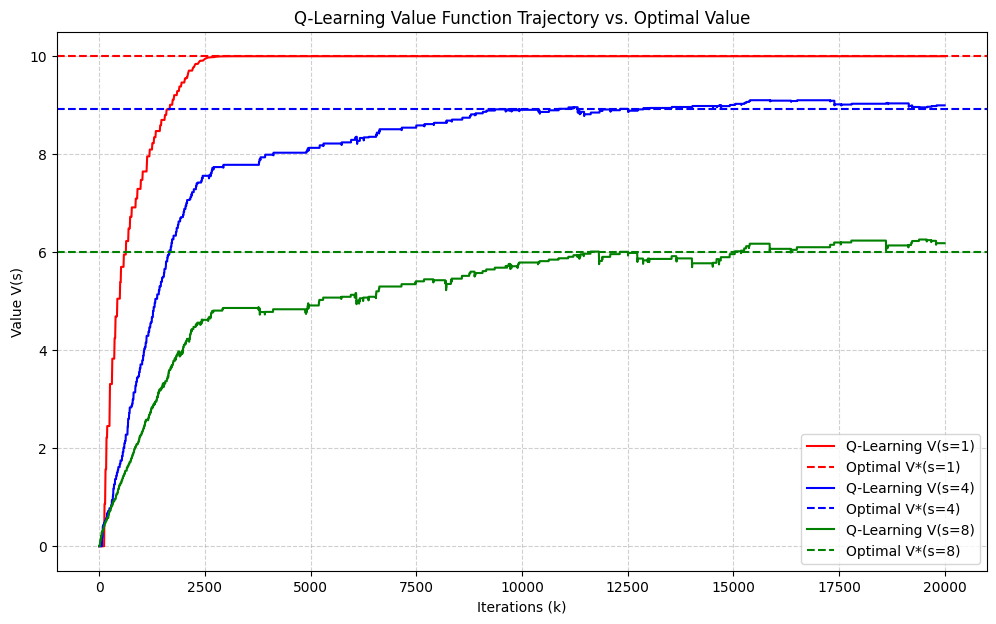

In [7]:
import matplotlib.pyplot as plt

S = 10
THETA = 0.5
C = 8
GAMMA = 0.9
ALPHA = 0.1
EPSILON = 0.009
MAX_ITER = 20000

v_star, pi_star, vi_actions = value_iteration(
    S=S, theta=THETA, C=C, gamma=GAMMA, max_iter=MAX_ITER
)

q_history, ql_actions = q_learning(
    S=S,
    theta=THETA,
    C=C,
    gamma=GAMMA,
    alpha=ALPHA,
    epsilon=EPSILON,
    max_iterations=MAX_ITER,
    s0=S,
    decreasing_params=False,
)

v_from_q = np.zeros((len(q_history), S))
for i, q_table in enumerate(q_history):
    v_from_q[i, :] = np.min(q_table, axis=1)

plt.figure(figsize=(12, 7))

for i, state_to_plot in enumerate([1, 4, 8]):
    colors = ["red", "blue", "green"]
    plt.plot(
        v_from_q[:, state_to_plot - 1],
        label=f"Q-Learning V(s={state_to_plot})",
        color=colors[i],
    )
    plt.axhline(
        y=v_star[state_to_plot - 1],
        linestyle="--",
        label=f"Optimal V*(s={state_to_plot})",
        color=colors[i],
    )

plt.title("Q-Learning Value Function Trajectory vs. Optimal Value")
plt.xlabel("Iterations (k)")
plt.ylabel("Value V(s)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



##### 2b) Trayectoria de la Función de Valor de Q-Learning vs Valor Óptimo

El gráfico anterior muestra la trayectoria de min_b{Q_k(s,b)} para diferentes estados (s=1,4,8) comparada con sus valores óptimos correspondientes V*(s) obtenidos mediante value iteration.

Se puede observar que:

1. Los valores de Q-learning convergen a los valores óptimos para todos los estados mostrados. Esto se debe a que el algoritmo es capaz de aprender la función de valor óptima, aún sin conocer explícitamente las probabilidades de transición.
2. Hay cierta varianza/ruido inicial en las trayectorias de Q-learning.
3. La convergencia ocurre después de aproximadamente 5000-12000 iteraciones. La velocidad de convergencia depende del estado.

##### 2c) Varianza Decreciente

La varianza del algoritmo Q-learning disminuye notablemente después de aproximadamente 10000 iteraciones. Esto ocurre porque inicialmente el algoritmo comienza con una inicialización cualquiera de los valores del problema. A medida que acumula experiencia y toma muestras del problema, las estimaciones se vuelven más precisas


##### 2d) Calidad de la política en k=10

Si el algoritmo Q-learning se detiene en k=10 iteraciones, la política obtenida sería de muy mala calidad porque:

1. Los Q-valores no han tenido tiempo suficiente para converger a estimaciones precisas
2. El algoritmo apenas ha comenzado a explorar el espacio de estados y acciones
3. Las estimaciones iniciales son muy ruidosas y están lejos de los valores óptimos


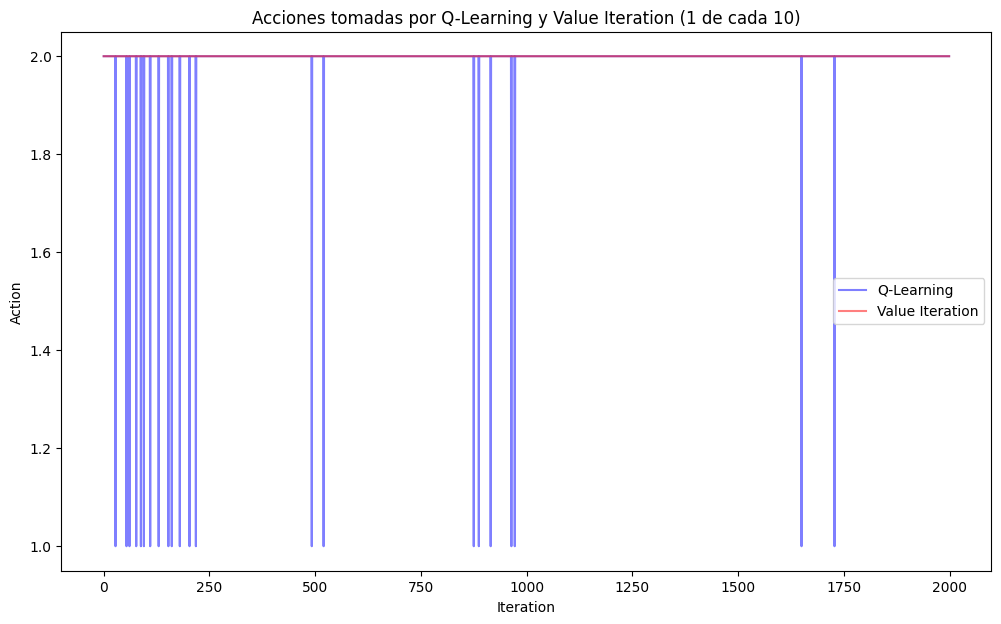

In [24]:
plt.figure(figsize=(12, 7))
plt.plot(ql_actions[::10], label="Q-Learning", color="blue", alpha=0.5)
plt.plot(vi_actions[::10], label="Value Iteration", color="red", alpha=0.5)
plt.title("Acciones tomadas por Q-Learning y Value Iteration (1 de cada 10)")
plt.xlabel("Iteration")
plt.ylabel("Action")
plt.legend()
plt.show()

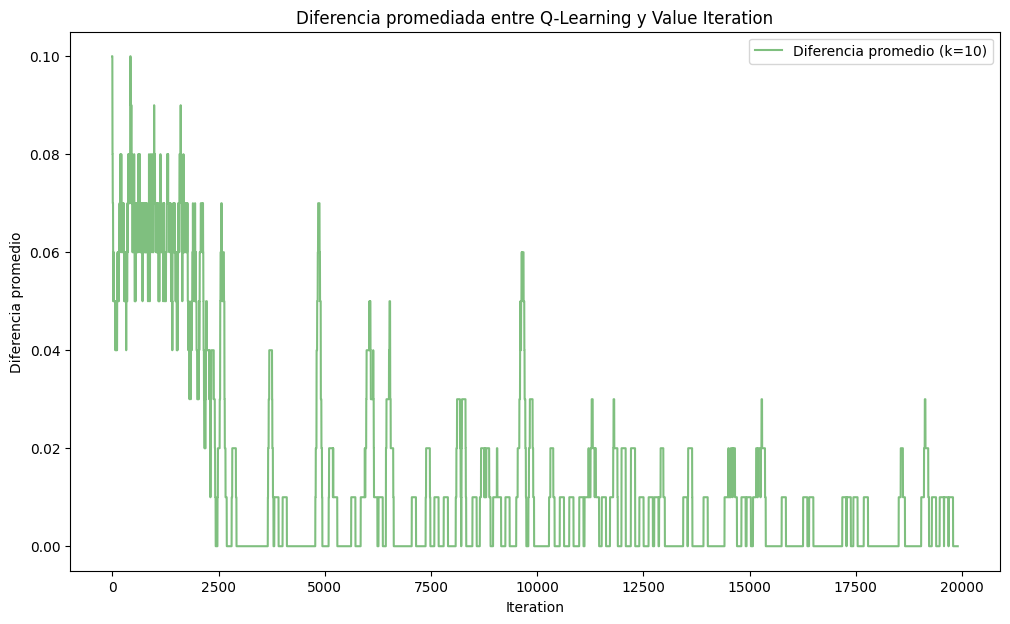

In [9]:
diferencia = np.abs(np.array(ql_actions) - np.array(vi_actions))
ventana = 100
media_movil = np.convolve(diferencia, np.ones(ventana)/ventana, mode='valid')

plt.figure(figsize=(12, 7))
plt.plot(media_movil, label="Diferencia promedio (k=10)", color="green", alpha=0.5)
plt.title("Diferencia promediada entre Q-Learning y Value Iteration")
plt.xlabel("Iteration") 
plt.ylabel("Diferencia promedio")
plt.legend()
plt.show()

3a) La distancia entre las acciones elegidas por Q-learning y Value Iteration muestra una tendencia decreciente a lo largo de las iteraciones, como se puede observar en el gráfico anterior. Inicialmente hay una gran diferencia debido a que Q-learning parte de estimaciones aleatorias, pero gradualmente converge hacia las acciones óptimas determinadas por Value Iteration. La diferencia promedio se reduce significativamente después de aproximadamente 2000 iteraciones. Luego, la diferencia se debe principalmente a la política de $\epsilon$-greedy, ya que con una probabilidad $\epsilon$ se toma una acción aleatoria.

3b) Basándonos en los gráficos anteriores, la política generada por Q-learning podría considerarse lo suficientemente buena para implementarse en un escenario real después de aproximadamente 15000 iteraciones. En este punto:
- La diferencia promedio con Value Iteration se ha estabilizado
- Los Q-valores han convergido razonablemente bien
- La varianza en las acciones seleccionadas es baja
- El comportamiento es consistente y cercano al óptimo

Es importante tener en cuenta que esto depende de los parámetros del problema. Al aumentar el epsilon (priorizar exploración por sobre explotación) se ve como los estados menos visitados convergen de forma más rápida, mientras que los menos visitados convergen más lento


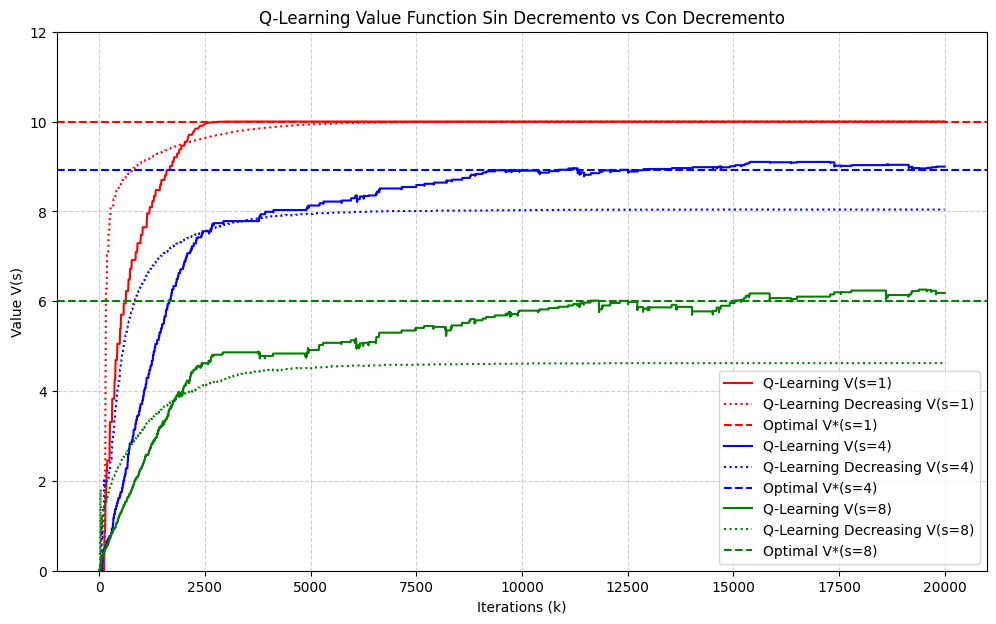

In [22]:
q_history_decr, ql_actions_decr = q_learning(
    S=S,
    theta=THETA,
    C=C,
    gamma=GAMMA,
    alpha=51,
    epsilon=1,
    max_iterations=MAX_ITER,
    s0=S,
    decreasing_params=True,
)

v_from_q_decr = np.zeros((len(q_history_decr), S))
for i, q_table in enumerate(q_history_decr):
    v_from_q_decr[i, :] = np.min(q_table, axis=1)

plt.figure(figsize=(12, 7))
for i, state_to_plot in enumerate([1, 4, 8]):
    colors = ["red", "blue", "green"]
    plt.plot(
        v_from_q[:, state_to_plot - 1],
        label=f"Q-Learning V(s={state_to_plot})",
        color=colors[i],
        linestyle="-",
    )
    plt.plot(
        v_from_q_decr[:, state_to_plot - 1],
        label=f"Q-Learning Decreasing V(s={state_to_plot})",
        color=colors[i],
        linestyle=":",
    )
    plt.axhline(
        y=v_star[state_to_plot - 1],
        linestyle="--",
        label=f"Optimal V*(s={state_to_plot})",
        color=colors[i],
    )

plt.title("Q-Learning Value Function Sin Decremento vs Con Decremento")
plt.xlabel("Iterations (k)")
plt.ylabel("Value V(s)")
plt.ylim(0, 12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Esto fue a lo que llegué, no me queda claro que converja (ni que tenga que converger) más rápido. Entiendo sí que la idea es que podés arrancar con un alpha y epsilon mayor (step size más grande y más exploración) y eso puede llevar a que aprendas más rápido al principio. Luego a medida que vas convergiendo ir disminuyendo los cambios y aprovechando más la explotación.

Para algunos valores parece mejorar más rápido pero demorar mas en converger.


Resultados:
Mejor Umbral (s*=2): 4.08
Q-Learning: 4.07
Ganador: Q-Learning


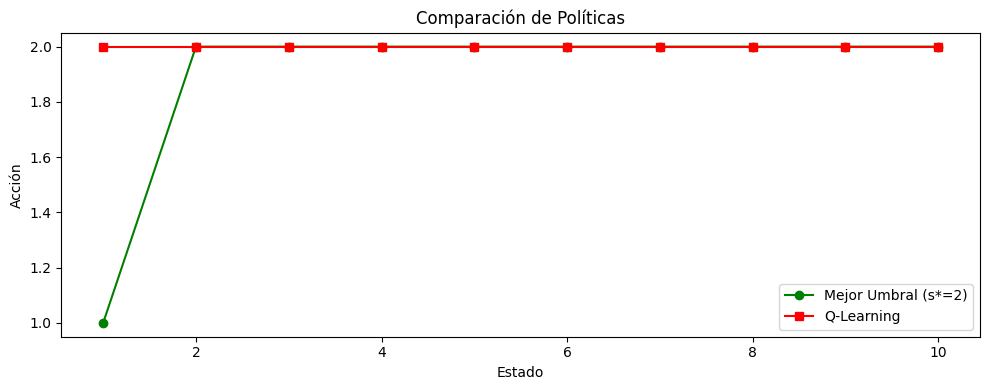

In [20]:
def simular_costo(politica, S, theta, C, gamma, T=500, num_sims=10):
    """
    Simula el costo descontado para una política.
    """
    costos = []
    for _ in range(num_sims):
        s, costo, descuento = S, 0, 1
        for _ in range(T):
            a = politica[s - 1]
            if a == 1:
                c, s = C, S
            else:
                c = (S - s) / (S - 1)
                s = max(1, s - 1) if np.random.rand() < theta else s
            costo += descuento * c
            descuento *= gamma
        costos.append(costo)
    return np.mean(costos)



costos_umbral = {}
for s_estrella in range(1, S + 1):
    politica = np.where(np.arange(1, S + 1) < s_estrella, 1, 2)
    costo = simular_costo(politica, S, THETA, C, GAMMA)
    costos_umbral[s_estrella] = costo

mejor_umbral = min(costos_umbral, key=costos_umbral.get)
mejor_costo = costos_umbral[mejor_umbral]

politica_ql = np.argmin(q_history[-1], axis=1) + 1
costo_ql = simular_costo(politica_ql, S, THETA, C, GAMMA)

print("\nResultados:")
print(f"Mejor Umbral (s*={mejor_umbral}): {mejor_costo:.2f}")
print(f"Q-Learning: {costo_ql:.2f}")
print(f"Ganador: {'Umbral' if mejor_costo < costo_ql else 'Q-Learning'}")


plt.figure(figsize=(10, 4))
estados = np.arange(1, S + 1)
mejor_politica = np.where(estados < mejor_umbral, 1, 2)
plt.plot(estados, mejor_politica, "g-o", label=f"Mejor Umbral (s*={mejor_umbral})")
plt.plot(estados, politica_ql, "r-s", label="Q-Learning")
plt.xlabel("Estado")
plt.ylabel("Acción")
plt.title("Comparación de Políticas")
plt.legend()
plt.tight_layout()
plt.show()



La política de umbral aprovecha el conocimiento de la estructura óptima del problema de reemplazo de máquinas. Al evaluar diferentes valores de umbral, podemos encontrar la política óptima de manera más eficiente que Q-learning. Esto solo se puede utilizar cuando se conoce la estructura del problema y además la cantidad de estados es pequeña.

El gráfico muestra la comparación entre ambas políticas, donde podemos observar que ambas convergen a políticas similares, validando la efectividad del algoritmo Q-learning para aprender la estructura de umbral óptima.

